# A1 - Complex Networks
### Authors: Ignacio Miguel Rodríguez and Daniel Arias Cámara

## Part 1. Structural characterization of networks

You can find four different networks labelled as net1, net2, net3 and net4 in the activityA1.zip
file.  To characterize their macroscopic structure, the students should analyze (at least) the following network descriptors:

* Number of nodes
* Number of edges
* Minimum, maximum, and average degree
* Average clustering coefficient (average of the clustering coefficient of each node)
* Assortativity
* Average path length (average distance between all pairs of nodes)
* Diameter (maximum distance between nodes in the network)

Apart from these indicators, the degree distribution provides crucial information to understand the macroscopic structure of networks. For this reason, the students should obtain the degree distribution of each network and choose its most suitable representation (histogram in linear scale or in histogram in log-log scale with logarithmic binning).

The microscopic structure of the network is instead characterized by analyzing different centralities for the nodes of the network. The students should list the 5 most central nodes according to different metrics (betweenness, degree, eigenvector) and comment the results. Are these centrality indicators providing the same information on the relevance of the nodes for the network?

PS. Visualization of these networks using networkx is discouraged due to their large size.

## 1. Net 1 

In [1]:
from utils import NetworkAnalyzer

file_path = "networks/net4.net"
analyzer = NetworkAnalyzer(file_path)
analyzer.extract_macroscopic_characterizations()


Number of nodes: 5000
Number of edges: 24975
Minimum degree: 5
Maximum degree: 210
Average degree: 9.99
Average clustering coefficient: 0.0107
Assortativity (degree correlation): -0.0325
Average path length: 3.4868
Diameter: 5


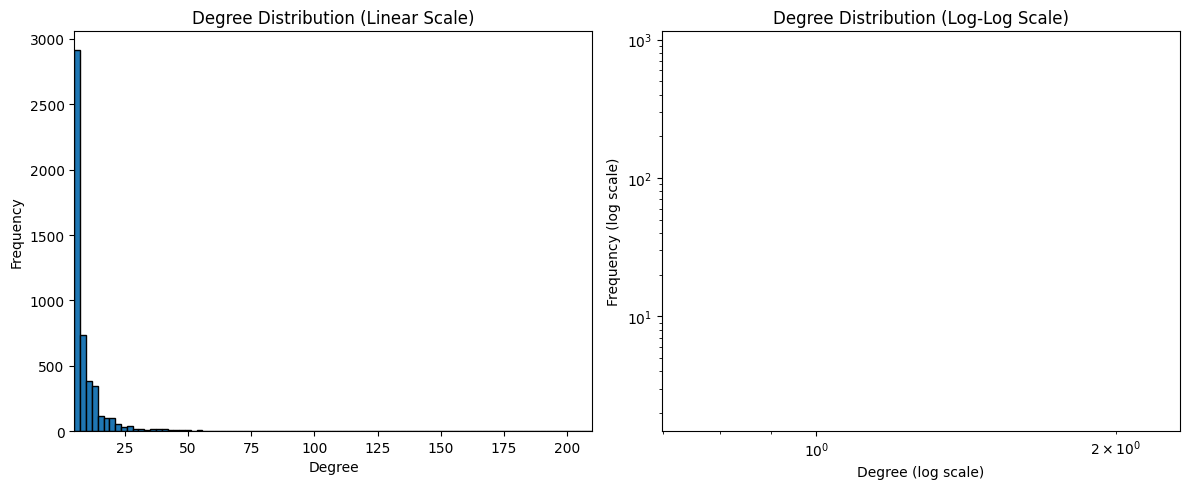

In [2]:
analyzer.plot_histograms()

In [3]:
analyzer.extract_microscopic_characterizations()


🔹 Top 5 Nodes by Betweenness Centrality:
   0: 0.0605
   6: 0.0576
   9: 0.0553
   8: 0.0391
   3: 0.0379

🔹 Top 5 Nodes by Degree Centrality:
   6: 0.0420
   0: 0.0412
   9: 0.0408
   10: 0.0326
   8: 0.0324

🔹 Top 5 Nodes by Eigenvector Centrality:
   6: 0.2239
   0: 0.2234
   9: 0.2062
   8: 0.1741
   3: 0.1686

🔹 Nodes appearing in all three centrality rankings: {'0', '6', '9', '8'}


## Part 2. Models
Based on the descriptors of the network and its degree distribution, the students should figure out the model used to generate the network. There are four possibilities: the ER model, the WS model with an intermediate rewiring probability, the BA model or the CM assuming a degree distribution which follows a power-law with $\gamma$<2.5.

To round off the activity, the students should analyze the network net5. This network is generated by a model which has not been explained in our lectures. The students should visualize the network (setting the positions of the nodes from the file ‘positions.txt’) and comment the most prominent features of the network. Is the network connected? Is it scale-free? Is the largest connected component a small-world network? From the visualization of the network, the students should propose an algorithm to generate the network. **Hint**: The algorithm starts by distributing the nodes randomly across space.

The delivery should include a single .zip file named ‘Groupxxx_SURNAME1_SURNAME2_A1.zip’ containing:

* A brief PDF report discussing the results obtained in the two parts of the activity.
* A Jupyter notebook with the code needed to reproduce the results.
PS: Networks are encoded in the pajek format (.net). The students should use nx.read_pajek to read each network.